In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from src.onts import ONTS

In [3]:
data_dir = Path('../data/raw/ONTS')

instances_fps = list(data_dir.glob('*.json'))
len(instances_fps)

747

In [4]:
instance = ONTS.from_file(np.random.choice(instances_fps))
instance

ONTS(jobs=9, T=125, power_use=[3.0435829855418017, 2.2758954049860365, 0.5910958893977495, 3.43371579451716, 3.1519820578743114, 1.351358128661663, 0.735355518362439, 0.12677940327335196, 3.4421477560839318], power_resource=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.76238733, 7.128866088, 7.455172248, 7.733763828, 7.957714518, 8.12148327, 8.337276306, 8.63864775, 8.866908144, 9.019286964, 9.094706784, 9.093013686, 9.015285096, 8.863983702, 8.642803536, 8.356362138, 8.01066231, 7.612168608, 7.168423014, 6.6877371, 6.178884192, 5.650945452, 5.113309878, 4.662637974, 4.536117378, 4.329405504, 4.04650422, 3.692031066, 3.272142762, 2.7936117, 2.653700238, 2.88134496, 3.070356264, 3.652320222, 4.23120582, 4.797316224, 5.341262436, 5.853655458, 6.325721964, 6.749458218, 7.11716832, 7.422387714, 7.659113598, 7.823036268, 7.910461692, 7.918927182, 7.847663148, 7.696515672, 7.467023934, 7.161650622, 6.784551522, 6.86397321, 7.179966864, 7.442089218, 7.6446

In [5]:
m = instance.to_scip()
m

In [8]:
m.optimize()

presolving:
(round 1, fast)       186 del vars, 615 del conss, 0 add conss, 693 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3855 clqs
(round 2, fast)       188 del vars, 709 del conss, 0 add conss, 693 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3862 clqs
   (0.1s) running MILP presolver
   (0.1s) MILP presolver (7 rounds): 75 aggregations, 0 fixings, 22 bound changes
(round 3, medium)     263 del vars, 709 del conss, 0 add conss, 715 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3826 clqs
(round 4, fast)       263 del vars, 802 del conss, 0 add conss, 715 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3828 clqs
(round 5, fast)       285 del vars, 824 del conss, 0 add conss, 715 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3828 clqs
(round 6, exhaustive) 285 del vars, 859 del conss, 0 add conss, 715 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3828 clqs
(round 7, exhaustive) 285 del var

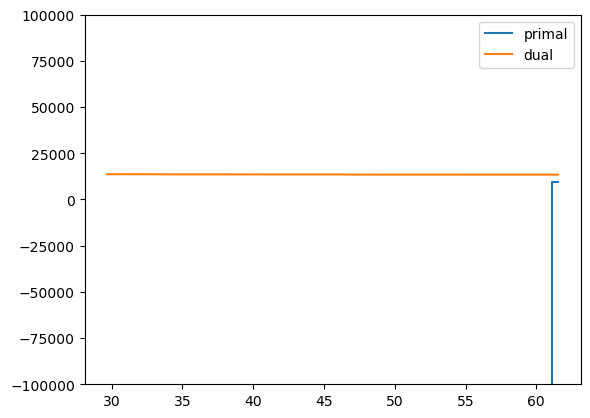

In [26]:
t, x = m.get_primal_curve()

primal_t, primal_x = m.get_primal_curve()
dual_t, dual_x = m.get_dual_curve()

plt.plot(primal_t, primal_x, label='primal')
plt.plot(dual_t, dual_x, label='dual')

plt.ylim(-1e5, 1e5)

plt.legend()
plt.show()

In [27]:
sols_dir = Path('../data/interim/ONTS')

instance_fp = np.random.choice(instances_fps)

opt_fpath = sols_dir/instance_fp.name.replace('.json', '_opt.npz')

print(instance_fp)
np.median(np.load(opt_fpath)['arr_3'])

../data/raw/ONTS/125_13_59.json


0.0

In [33]:
np.abs(-np.load(opt_fpath)['arr_3'] + np.load(opt_fpath)['arr_3'].astype('uint8')).max()

0.0

In [42]:
from src.dataset import ONTSFeatures

ds = ONTSFeatures(data_dir.glob('125_13_*.json'), sols_dir)
len(ds)

207

In [45]:
x, y = ds[33]

x.shape, y.shape

((13, 11), (3250,))